# Data Exploration

In [66]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('../out.csv')

In [67]:
rwoba, pwoba = stats.pearsonr(df['wobadiff (2023)'], df['ops_change 2023-2024'])
rslg, pslg = stats.pearsonr(df['xslgdiff (2023)'], df['ops_change 2023-2024'])
adjusted_df = df.dropna()
rhr, phr = stats.pearsonr(adjusted_df['xhrdiff (2023)'], adjusted_df['ops_change 2023-2024'])
rba, pba = stats.pearsonr(df['xbadiff (2023)'], df['ops_change 2023-2024'])

filtered_df = df[df['babipdiff (2023)'] != 0] #ignores 2023 rookies, since babip for that season = career babip
rbabip, pbabip = stats.pearsonr(filtered_df['babipdiff (2023)'], filtered_df['ops_change 2023-2024'])

data = {
    '%ΔOPS vs wOBA-xwOBA': [rwoba, rwoba**2, pwoba],
    '%ΔOPS vs SLG - xSLG': [rslg, rslg**2, pslg], 
    '%ΔOPS vs BA - xBA': [rba, rba**2, pba],
    '%ΔOPS vs HR - xHR': [rhr, rhr**2, phr],
    '%ΔOPS vs 2023 BABIP - Career BABIP': [rbabip, rbabip**2, pbabip]
}

values_df = pd.DataFrame.from_dict(data, orient='index', columns=['r', 'r^2', 'p'])
values_df.rename_axis("graph", inplace=True)
display(values_df)

,r,r^2,p
graph,,,
%ΔOPS vs wOBA-xwOBA,-0.454729,0.206779,5.861345e-12
%ΔOPS vs SLG - xSLG,-0.422607,0.178596,2.251576e-10
%ΔOPS vs BA - xBA,-0.422587,0.178580,2.256196e-10
%ΔOPS vs HR - xHR,-0.228158,0.052056,1.123589e-03
%ΔOPS vs 2023 BABIP - Career BABIP,-0.302709,0.091632,8.156711e-05


In [68]:
to_drop = ['on_base_plus_slg (2023)', 'on_base_plus_slg (2024)', 'player_id','xbadiff (2024)', 'xslgdiff (2024)', 
           'wobadiff (2024)','babipdiff (2024)','xhrdiff (2024)']

df.drop(to_drop, axis=1).describe()

,xbadiff (2023),xslgdiff (2023),wobadiff (2023),babipdiff (2023),xhrdiff (2023),ops_change 2023-2024
count,207.000000,207.000000,207.000000,207.000000,201.000000,207.000000
mean,0.001850,0.004797,-0.000135,-0.002119,0.983085,-3.616856
std,0.016559,0.036929,0.018839,0.019613,2.076803,11.790138
min,-0.035000,-0.099000,-0.041000,-0.070857,-4.700000,-41.469489
25%,-0.008000,-0.020000,-0.013000,-0.013250,-0.300000,-11.731323
50%,-0.001000,0.004000,-0.003000,0.000000,0.800000,-3.557814
75%,0.013000,0.024500,0.012500,0.007500,2.100000,3.596276
max,0.066000,0.146000,0.064000,0.071500,7.200000,28.667791


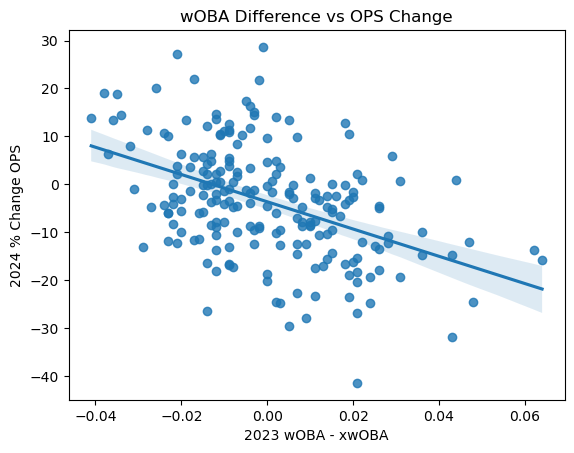

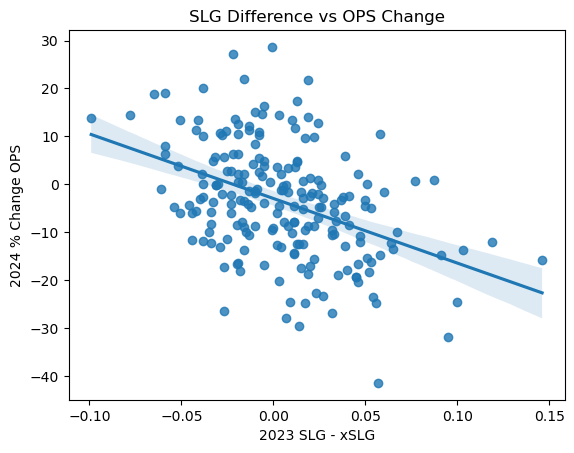

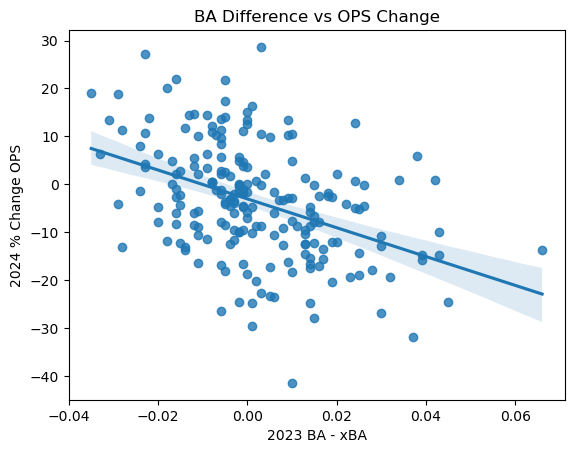

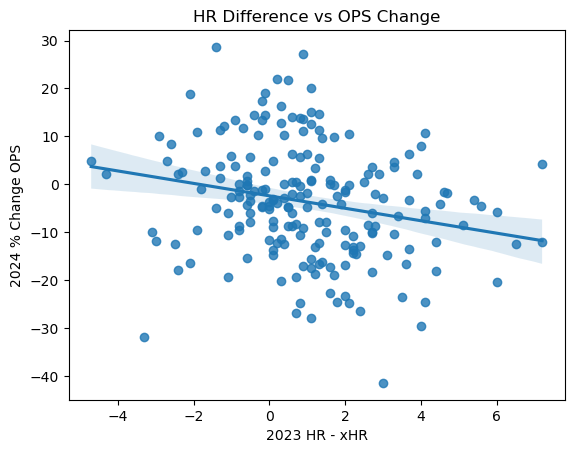

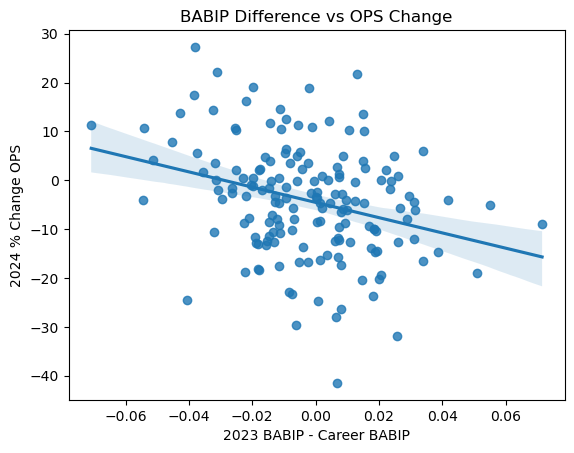

In [69]:
plt.figure()
sb.regplot(x='wobadiff (2023)', y='ops_change 2023-2024', data=df)
plt.title('wOBA Difference vs OPS Change'); plt.xlabel('2023 wOBA - xwOBA'); plt.ylabel('2024 % Change OPS');

plt.figure()
sb.regplot(x='xslgdiff (2023)', y='ops_change 2023-2024', data=df)
plt.title('SLG Difference vs OPS Change'); plt.xlabel('2023 SLG - xSLG'); plt.ylabel('2024 % Change OPS');

plt.figure()
sb.regplot(x='xbadiff (2023)', y='ops_change 2023-2024', data=df)
plt.title('BA Difference vs OPS Change'); plt.xlabel('2023 BA - xBA'); plt.ylabel('2024 % Change OPS');
 
plt.figure()
sb.regplot(x='xhrdiff (2023)', y='ops_change 2023-2024', data=df)
plt.title('HR Difference vs OPS Change'); plt.xlabel('2023 HR - xHR'); plt.ylabel('2024 % Change OPS');

filtered_df = df[df['babipdiff (2023)'] != 0] #ignores 2023 rookies, since babip for that season = career babip
plt.figure()
sb.regplot(x='babipdiff (2023)', y='ops_change 2023-2024', data=filtered_df)
plt.title('BABIP Difference vs OPS Change'); plt.xlabel('2023 BABIP - Career BABIP'); plt.ylabel('2024 % Change OPS');